In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense,LSTM  # I use keras over Tensorflow 2, so I don't need extra Keras libraries.
from tensorflow.keras.models import Sequential  # Tensorflow includes Keras libraries after 2nd version of Tensorflow
from sklearn.preprocessing import MinMaxScaler  # If you have Tensorflow 1, please upgrade your library using:
                                                # conda install tensorflow
                                                # This command will upgrade your Tensorflow module to the latest version.

In [7]:
# You can downlad the dataset from Kaggle link below:
# https://www.kaggle.com/chirag19/air-passengers

data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data.rename(columns={'#Passengers':'passengers'},inplace=True)
# Since this is a time series, we need only second column.. So data now contains only passenger count...
data = data['passengers']


In [9]:
type(data)

pandas.core.series.Series

In [10]:
data

0      112
1      118
2      132
3      129
4      121
      ... 
139    606
140    508
141    461
142    390
143    432
Name: passengers, Length: 144, dtype: int64

In [11]:
data=np.array(data).reshape(-1,1)

In [12]:
# ok, now we have 2D numpy array...
type(data)

numpy.ndarray

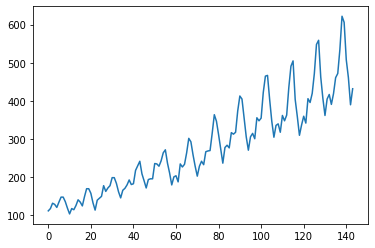

In [13]:
# Lets plot our data:
plt.plot(data)
plt.show()

In [14]:
scaler = MinMaxScaler()
data = scaler.fit_transform(data)

In [15]:
len(data)

144

In [16]:
train = data[0:100,:]
test = data[100:,:]

In [17]:
def get_data(data, steps):      
    dataX = []
    dataY = []
    for i in range(len(data)-steps-1):
        a = data[i:(i+steps), 0]
        dataX.append(a)
        dataY.append(data[i+steps, 0])
    return np.array(dataX), np.array(dataY)

In [54]:
steps = 5


In [55]:
X_train, y_train = get_data(train, steps)
X_test, y_test = get_data(test, steps)



In [56]:
# Im reshaping my sets for using in LSTM model..
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


In [57]:
# I will use a Sequential model with 2 hidden layers
# Instead of neurons, LSTM networks have memory blocks that are connected through layers.
# The default sigmoid activation function is used for the LSTM blocks. 

model = Sequential()
model.add(LSTM(128, input_shape = (1, steps)))  # This is my first hidden layer with 128 memory blocks
model.add(Dense(64))                                  # This is my second hidden layer with 64 memory blocks
model.add(Dense(1))   # This is my output layer
model.compile(loss = 'mean_squared_error', optimizer = 'adam')

In [58]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 128)               68608     
                                                                 
 dense_8 (Dense)             (None, 64)                8256      
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 76,929
Trainable params: 76,929
Non-trainable params: 0
_________________________________________________________________


In [59]:
model.fit(X_train, y_train, epochs=25, batch_size=1)

Epoch 1/25
94/94 [==============================] - 2s 3ms/step - loss: 0.0092
Epoch 2/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 3/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 4/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0033
Epoch 5/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0038
Epoch 6/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0032
Epoch 7/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 8/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 9/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 10/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 11/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 12/25
94/94 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 13/25
94/94 [==============================

In [60]:
y_pred = model.predict(X_test)

In [61]:
y_pred = scaler.inverse_transform(y_pred)
y_test = y_test.reshape(-1, 1)
y_test = scaler.inverse_transform(y_test)

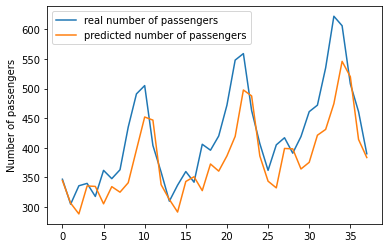

In [62]:
# plot real number of passengers and predictions...
plt.plot(y_test, label = 'real number of passengers')
plt.plot(y_pred, label = 'predicted number of passengers')
plt.ylabel('Months')
plt.ylabel('Number of passengers')
plt.legend()
plt.show()